In [10]:

import pandas as pd
import numpy as np
import seaborn as sns
import seaborn as sns
sns.set(rc={'figure.figsize':[7,7]},font_scale=1.2)

In [11]:
df=pd.read_csv("train.csv")

In [12]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [14]:
def calculate_profit(x):
    casual2=x["casual"]
    registerd3=x['registered']
    maintence_per_hour=1500/(365*24)
    profit_cash= casual2*20   + registerd3*5
    profit_with_taxes=profit_cash-(0.14*profit_cash)
    total_profit=profit_with_taxes- maintence_per_hour
    return total_profit




df['profit'] = df[['casual', 'registered']].apply(calculate_profit, axis=1)

df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,107.328767
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,275.028767
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,201.928767
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,94.428767
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4.128767
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1534.928767
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1165.128767
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,773.828767
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,709.328767


C:\Users\fox\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


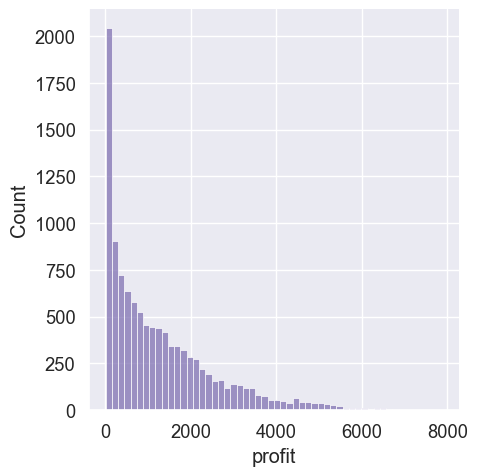

In [15]:
sns.displot(df['profit'],kde=False,color='m')

C:\Users\fox\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


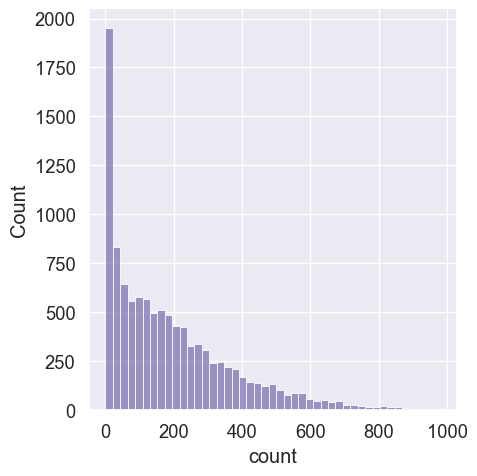

In [16]:
sns.displot(df['count'],kde=False,color='m')

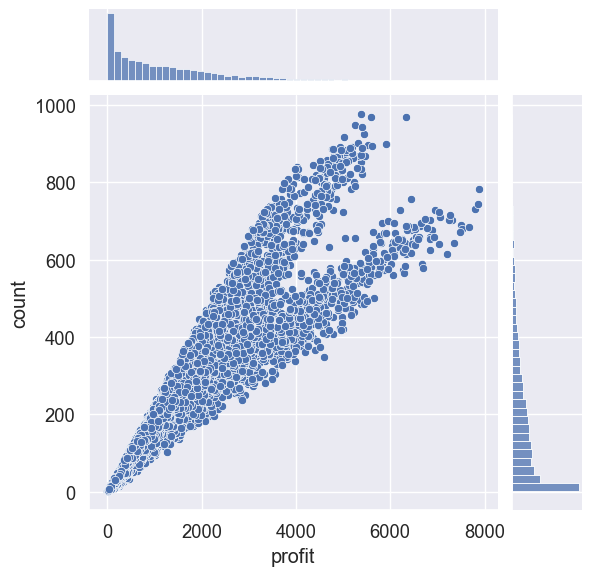

In [17]:

sns.jointplot(x='profit', y='count', data=df)

In [18]:
df['profit'].describe()

count    10886.000000
mean      1288.280751
std       1309.683400
min          4.128767
25%        253.528767
50%        889.928767
75%       1891.828767
max       7881.728767
Name: profit, dtype: float64

In [19]:
df['count'].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [20]:
df[df['count']==df['count'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit
9345,2012-09-12 18:00:00,3,0,1,1,27.06,31.06,44,16.9979,91,886,977,5374.828767


In [21]:
df[df['profit']==df['profit'].max()]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit
9415,2012-09-15 16:00:00,3,0,0,2,27.06,31.06,36,15.0013,350,433,783,7881.728767


In [22]:
df['datetime']= pd.to_datetime(df['datetime'],format='%Y-%m-%d %H:%M:%S',errors='coerce')


In [23]:
df['year']=df['datetime'].dt.year
df['month_name']=df['datetime'].dt.month_name()
df['day_weak']=df['datetime'].dt.day_name()
df['hour']=df['datetime'].dt.hour
df

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,profit,year,month_name,day_weak,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,107.328767,2011,January,Saturday,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,275.028767,2011,January,Saturday,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,201.928767,2011,January,Saturday,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,94.428767,2011,January,Saturday,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,4.128767,2011,January,Saturday,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,1534.928767,2012,December,Wednesday,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,1165.128767,2012,December,Wednesday,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,773.828767,2012,December,Wednesday,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,709.328767,2012,December,Wednesday,22


In [24]:
df.groupby('day_weak').describe()[['count','profit']]

count                                                          \
            count        mean  min   25%    50%    75%    max         std   
day_weak                                                                    
Friday     1529.0  197.844343  1.0  52.0  167.0  290.0  900.0  172.518208   
Monday     1551.0  190.390716  1.0  39.0  146.0  277.5  968.0  180.943376   
Saturday   1584.0  196.665404  1.0  45.0  141.5  309.5  783.0  180.917795   
Sunday     1579.0  180.839772  1.0  43.0  119.0  298.0  757.0  167.022145   
Thursday   1553.0  197.296201  1.0  44.0  155.0  280.0  901.0  187.606619   
Tuesday    1539.0  189.723847  1.0  36.0  146.0  274.0  970.0  186.719673   
Wednesday  1551.0  188.411348  1.0  38.0  136.0  270.5  977.0  190.942004   

           profit                                                  \
            count         mean       min         25%          50%   
day_weak                                                            
Friday     1529.0  1250.484751  4.128767  300.828767  1036.128767   
Monday     1551.0  1203.496079  4.128767  249.228767   954.428767   
Saturday   1584.0  1666.252504  4.128767  283.628767   956.578767   
Sunday     1579.0  1513.401535  4.128767  287.928767   812.528767   
Thursday   1553.0  1157.893803  4.128767  236.328767   911.428767   
Tuesday    1539.0  1112.073082  4.128767  210.528767   834.028767   
Wednesday  1551.0  1100.526188  4.128767  210.528767   791.028767   

                                                  
                   75%          max          std  
day_weak                                          
Friday     1891.828767  5908.028767  1110.019552  
Monday     1827.328767  5594.128767  1129.727600  
Saturday   2614.228767  7881.728767  1772.625088  
Sunday     2429.328767  7034.628767  1571.404307  
Thursday   1741.328767  5533.928767  1086.029849  
Tuesday    1704.778767  6338.028767  1065.481400  
Wednesday  1657.478767  5447.928767  1111.243780

In [25]:
df.groupby('day_weak').describe()[['profit']].transpose()

day_weak           Friday       Monday     Saturday       Sunday     Thursday  \
profit count  1529.000000  1551.000000  1584.000000  1579.000000  1553.000000   
       mean   1250.484751  1203.496079  1666.252504  1513.401535  1157.893803   
       min       4.128767     4.128767     4.128767     4.128767     4.128767   
       25%     300.828767   249.228767   283.628767   287.928767   236.328767   
       50%    1036.128767   954.428767   956.578767   812.528767   911.428767   
       75%    1891.828767  1827.328767  2614.228767  2429.328767  1741.328767   
       max    5908.028767  5594.128767  7881.728767  7034.628767  5533.928767   
       std    1110.019552  1129.727600  1772.625088  1571.404307  1086.029849   

day_weak          Tuesday    Wednesday  
profit count  1539.000000  1551.000000  
       mean   1112.073082  1100.526188  
       min       4.128767     4.128767  
       25%     210.528767   210.528767  
       50%     834.028767   791.028767  
       75%    1704.778767  1657.478767  
       max    6338.028767  5447.928767  
       std    1065.481400  1111.243780

In [26]:
df.groupby('day_weak').describe()[['count']].transpose()

day_weak          Friday       Monday     Saturday       Sunday     Thursday  \
count count  1529.000000  1551.000000  1584.000000  1579.000000  1553.000000   
      mean    197.844343   190.390716   196.665404   180.839772   197.296201   
      min       1.000000     1.000000     1.000000     1.000000     1.000000   
      25%      52.000000    39.000000    45.000000    43.000000    44.000000   
      50%     167.000000   146.000000   141.500000   119.000000   155.000000   
      75%     290.000000   277.500000   309.500000   298.000000   280.000000   
      max     900.000000   968.000000   783.000000   757.000000   901.000000   
      std     172.518208   180.943376   180.917795   167.022145   187.606619   

day_weak         Tuesday    Wednesday  
count count  1539.000000  1551.000000  
      mean    189.723847   188.411348  
      min       1.000000     1.000000  
      25%      36.000000    38.000000  
      50%     146.000000   136.000000  
      75%     274.000000   270.500000  
      max     970.000000   977.000000  
      std     186.719673   190.942004

In [27]:
df.groupby('season').describe()['profit']

,count,mean,min,25%,50%,75%,max,std
season,,,,,,,,
1,2686.0,699.920316,4.128767,128.828767,438.428767,920.028767,7679.628767,853.820568
2,2733.0,1537.472894,4.128767,322.328767,1216.728767,2244.428767,7795.728767,1453.088262
3,2733.0,1681.463893,4.128767,442.728767,1414.528767,2463.728767,7881.728767,1427.630038
4,2734.0,1224.171196,4.128767,292.228767,937.228767,1754.228767,7864.528767,1185.870080


In [28]:
df.groupby('season').describe()['count'].transpose()

season,1,2,3,4
count,2686.000000,2733.000000,2733.000000,2734.000000
mean,116.343261,215.251372,234.417124,198.988296
min,1.000000,1.000000,1.000000,1.000000
25%,24.000000,49.000000,68.000000,51.000000
50%,78.000000,172.000000,195.000000,161.000000
75%,164.000000,321.000000,347.000000,294.000000
max,801.000000,873.000000,977.000000,948.000000
std,125.273974,192.007843,197.151001,177.622409


In [29]:
df.groupby('weather').describe()['count'].transpose()

weather,1,2,3,4
count,7192.000000,2834.000000,859.000000,1.0
mean,205.236791,178.955540,118.846333,164.0
min,1.000000,1.000000,1.000000,164.0
25%,48.000000,41.000000,23.000000,164.0
50%,161.000000,134.000000,71.000000,164.0
75%,305.000000,264.000000,161.000000,164.0
max,977.000000,890.000000,891.000000,164.0
std,187.959566,168.366413,138.581297,NaN


In [30]:
df.groupby('weather').describe()['profit'].transpose()

weather,1,2,3,4
count,7192.000000,2834.000000,859.000000,1.000000
mean,1402.328892,1166.470052,735.874634,782.428767
min,4.128767,4.128767,4.128767,782.428767
25%,287.928767,244.928767,124.528767,782.428767
50%,1014.628767,825.428767,399.728767,782.428767
75%,2055.228767,1745.628767,956.578767,782.428767
max,7864.528767,7881.728767,5542.528767,782.428767
std,1381.640444,1159.674508,925.977295,NaN


In [31]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation
correlation_matrix = numeric_columns.corr()

# Select the specific columns you're interested in
result = correlation_matrix[['profit', 'count']]

In [32]:
def is_rash_hour(hour):
   
    return 1 if hour in [7,8,9,15,16,17] else 0
   

df['is_rash_hou']=df['hour'].apply(is_rash_hour)

In [33]:
#df.groupby('is_rash_hour').describe()['count'].transpose()

In [34]:
df.groupby('is_rash_hour').describe()['profit'].transpose()

KeyError: 'is_rash_hour'

In [ ]:
df.groupby('workingday').describe()['count'].transpose()

In [ ]:
df.groupby('workingday').describe()['profit'].transpose()

In [ ]:
#df.corr()[['count','profit']].loc[['casual','registered']]

In [ ]:
df.groupby('day_weak').describe()[['count']].transpose()

In [ ]:
def is_month(month_name):
    return 1 if month_name in ['September', 'October', 'November', 'December','February', 'March', 'April', 'May', 'June']else 0




df['is_school_day']=df['month_name'].apply(is_month)

In [ ]:
df['month_name'].unique()

In [ ]:
df.groupby('is_school_day').describe()[['count']]

In [35]:
df.groupby('is_school_day').describe()[['profit']]

KeyError: 'is_school_day'

In [36]:
df[(df['year']==2011)   & (df['day_weak']=='Saturday')  &   (df['season']=='Fall')]['profit'].sum()

0.0

**data visualisation**

C:\Users\fox\AppData\Local\Temp\ipykernel_18736\3856558155.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['temp'],kde=False,color='m')


<Axes: xlabel='temp'>

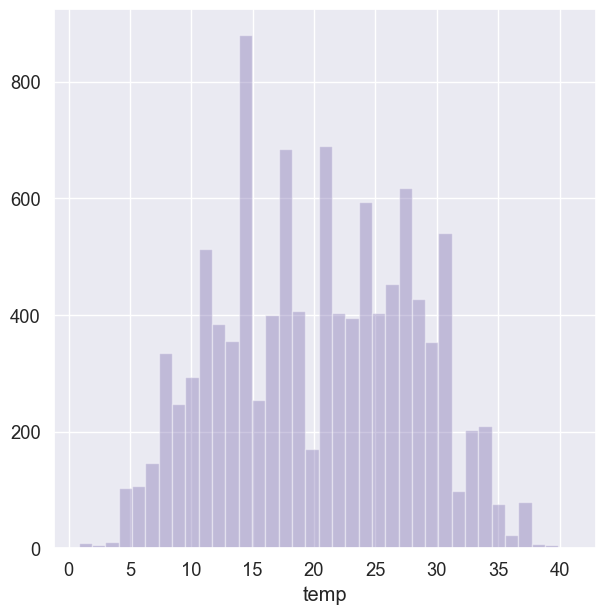

In [37]:
sns.distplot(df['temp'],kde=False,color='m')

C:\Users\fox\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


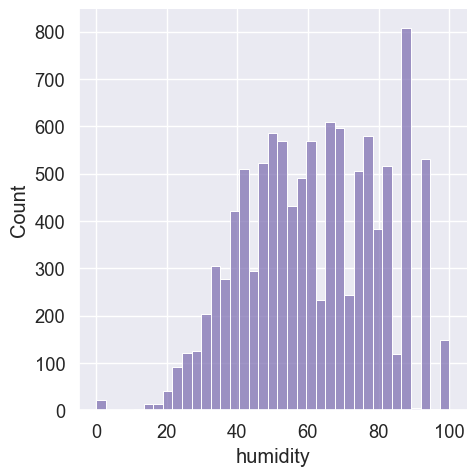

In [38]:
sns.displot(df['humidity'],kde=False,color='m')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  int64         
 2   holiday      10886 non-null  int64         
 3   workingday   10886 non-null  int64         
 4   weather      10886 non-null  int64         
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  count        10886 non-null  int64         
 12  profit       10886 non-null  float64       
 13  year         10886 non-null  int32         
 14  month_name   10886 non-null  object        
 15  day_weak     10886 non-null  object        
 16  hour

C:\Users\fox\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


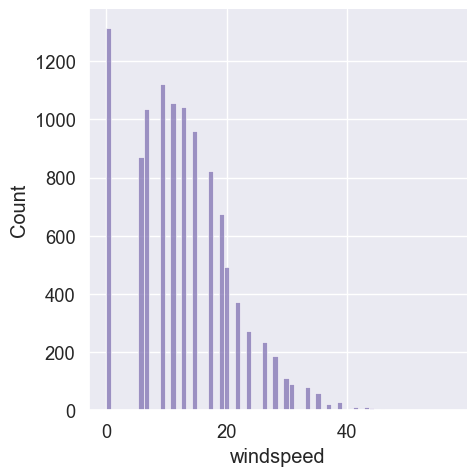

In [40]:
sns.displot(df['windspeed'],kde=False,color='m')

C:\Users\fox\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


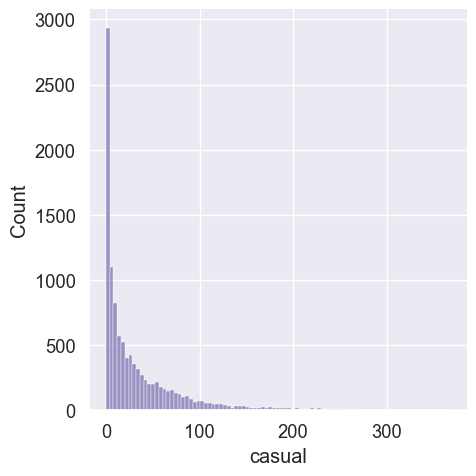

In [41]:
sns.displot(df['casual'],kde=False,color='m')

C:\Users\fox\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


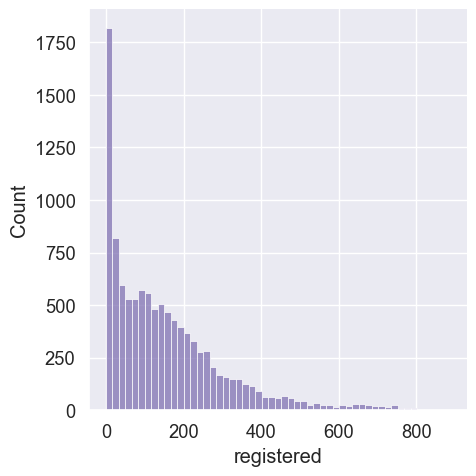

In [42]:
sns.displot(df['registered'],kde=False,color='m')

C:\Users\fox\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


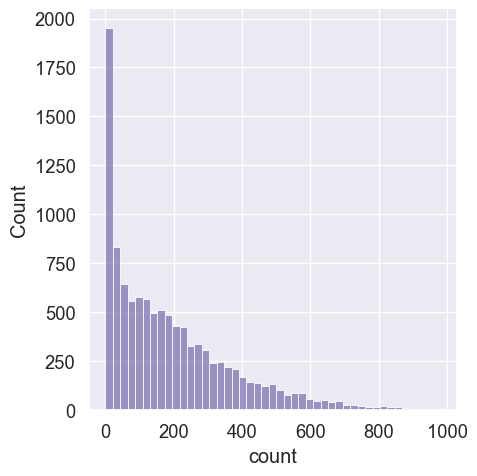

In [43]:
sns.displot(df['count'],kde=False,color='m')

C:\Users\fox\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


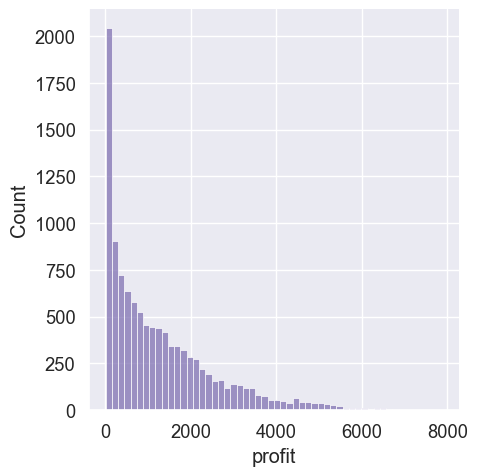

In [44]:
sns.displot(df['profit'],kde=False,color='m')

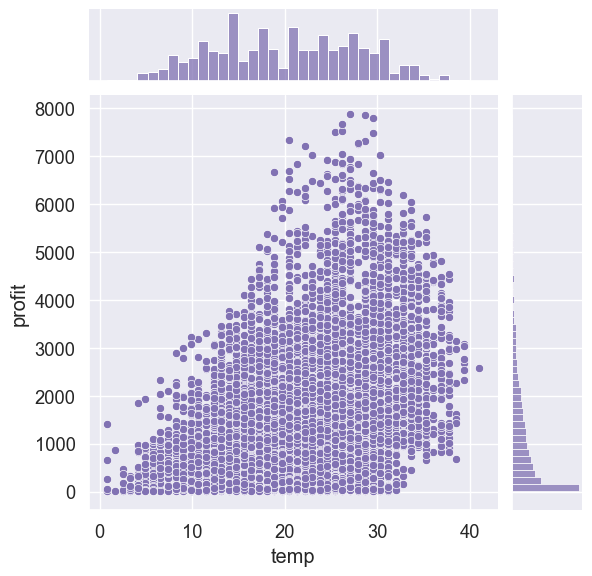

In [45]:
sns.jointplot(x ='temp' , y='profit',data=df,color='m')

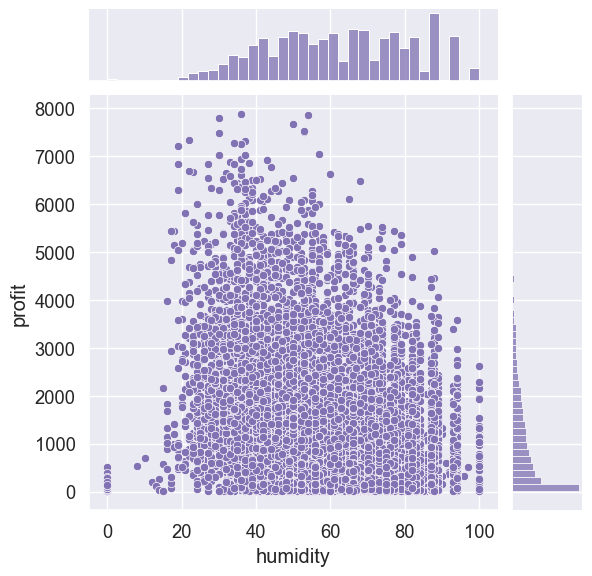

In [46]:
sns.jointplot(x ='humidity' , y='profit',data=df,color='m')

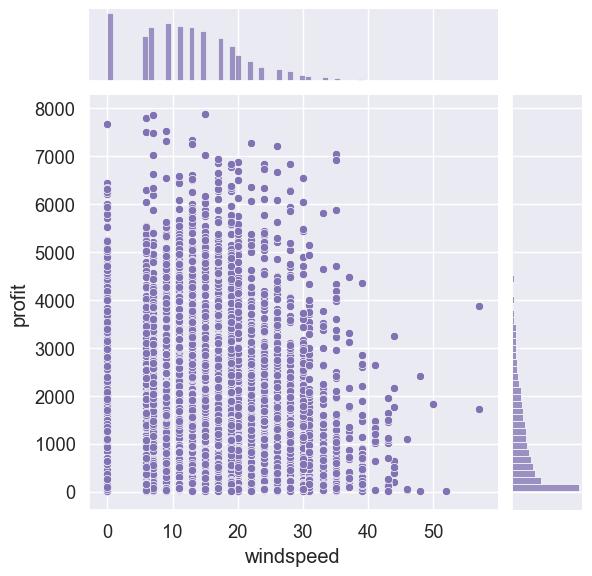

In [47]:
sns.jointplot(x ='windspeed' , y='profit',data=df,color='m')

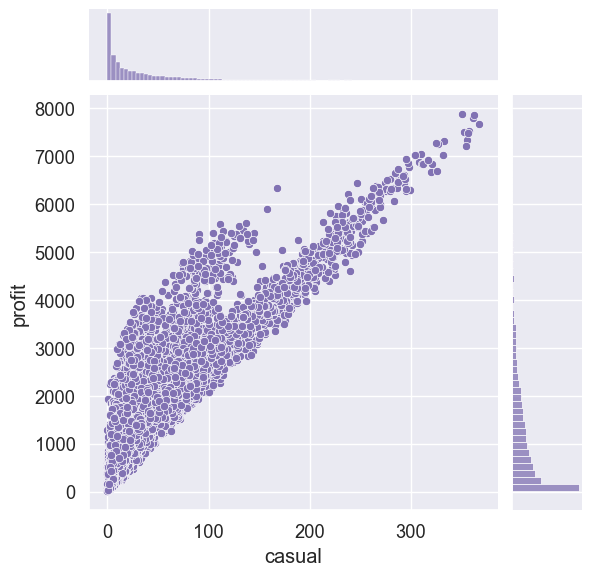

In [48]:
sns.jointplot(x ='casual' , y='profit',data=df,color='m')

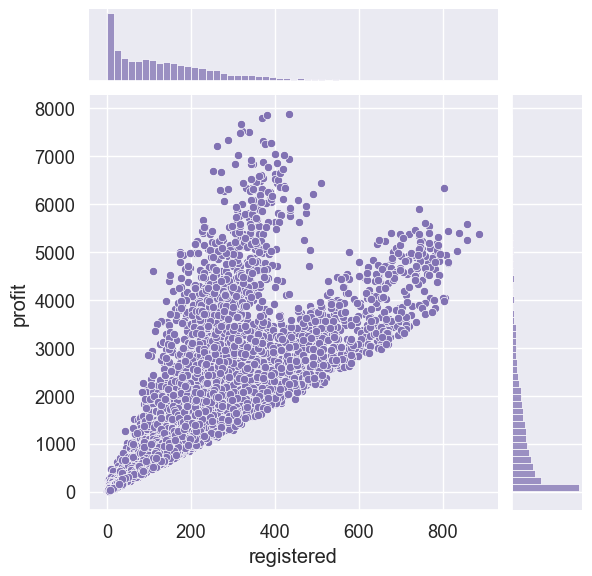

In [49]:
sns.jointplot(x ='registered' , y='profit',data=df,color='m')

<Axes: xlabel='season', ylabel='count'>

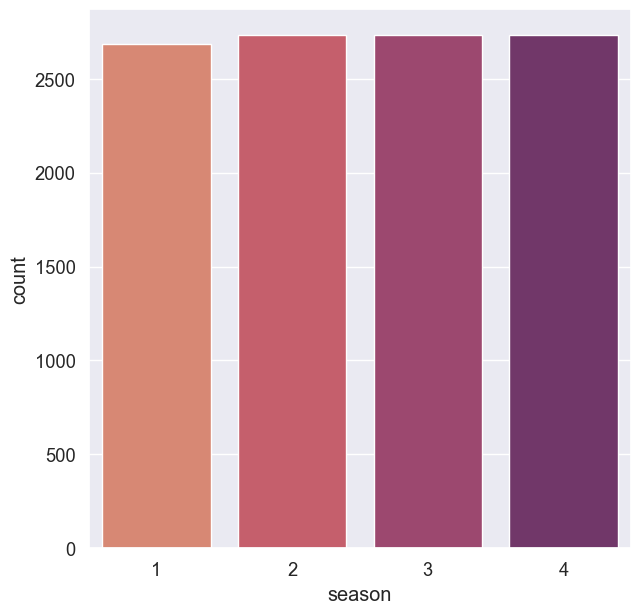

In [50]:
sns.countplot(x='season',data=df,palette='flare')

<Axes: xlabel='holiday', ylabel='count'>

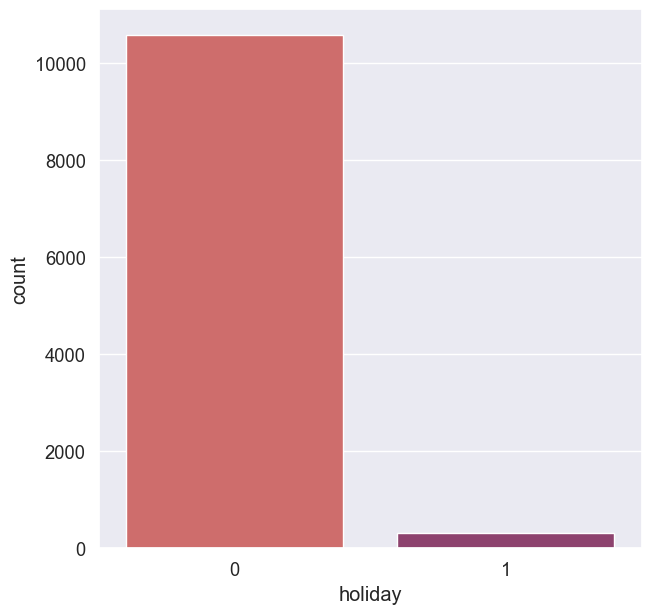

In [51]:
sns.countplot(x='holiday',data=df,palette='flare')

<Axes: xlabel='workingday', ylabel='count'>

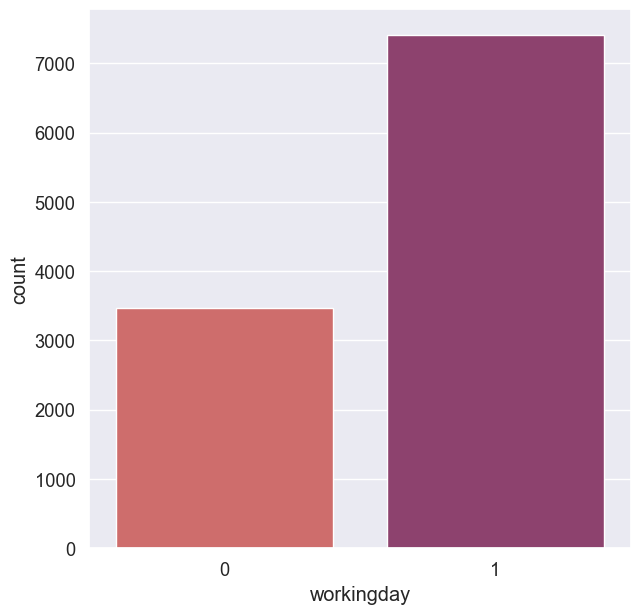

In [52]:
sns.countplot(x='workingday',data=df,palette='flare')

<Axes: xlabel='weather', ylabel='count'>

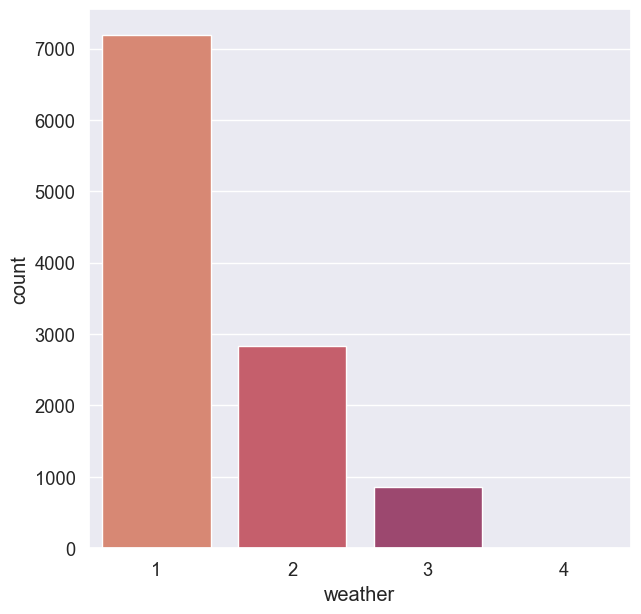

In [53]:
sns.countplot(x='weather',data=df,palette='flare')

<Axes: xlabel='year', ylabel='count'>

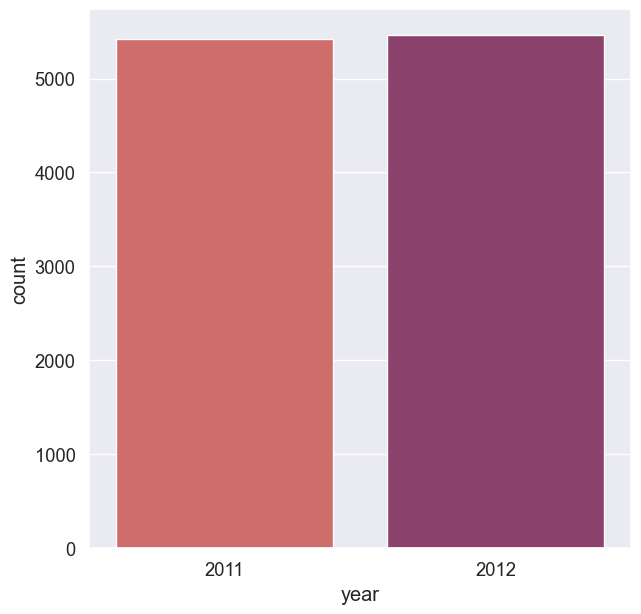

In [54]:
sns.countplot(x='year',data=df,palette='flare')

<Axes: xlabel='month_name', ylabel='count'>

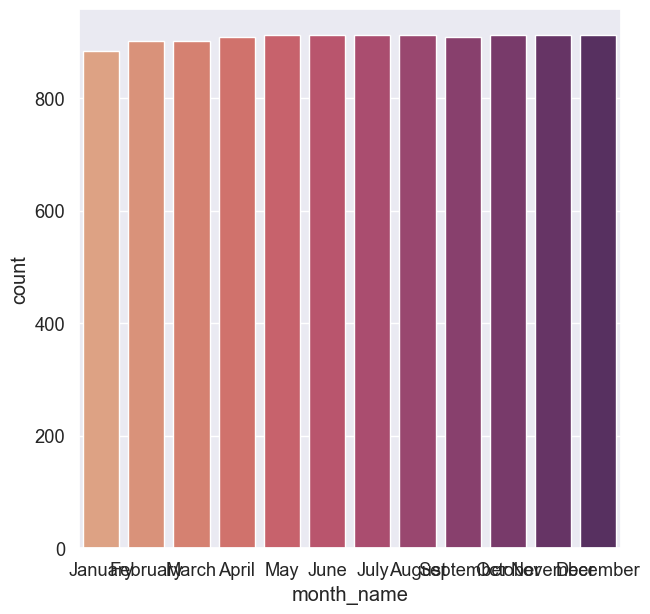

In [55]:
sns.countplot(x='month_name',data=df,palette='flare')

<Axes: xlabel='day_weak', ylabel='count'>

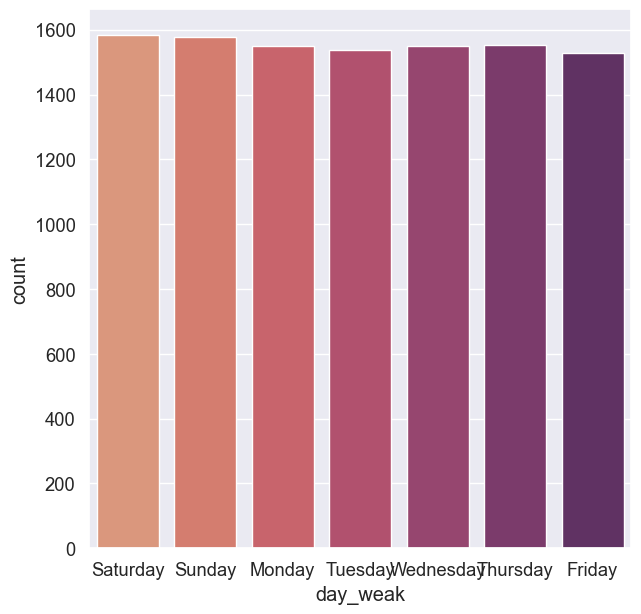

In [56]:
sns.countplot(x='day_weak',data=df,palette='flare')

<Axes: xlabel='day_weak', ylabel='count'>

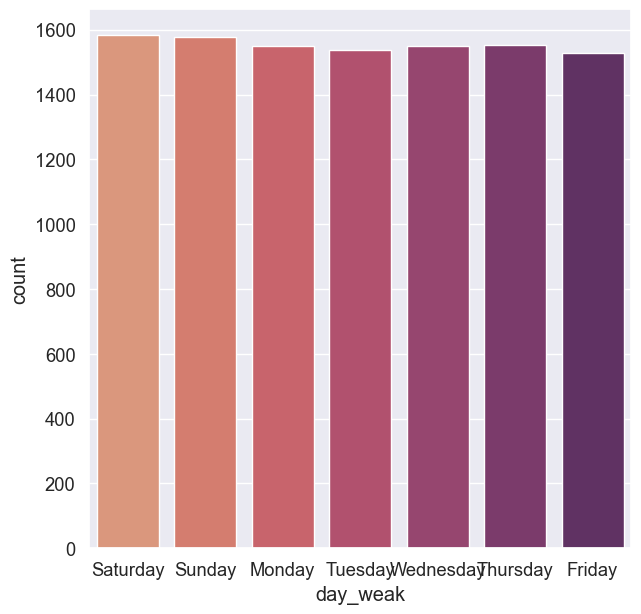

In [57]:
sns.countplot(x='day_weak',data=df,palette='flare')

<Axes: xlabel='is_rash_hou', ylabel='count'>

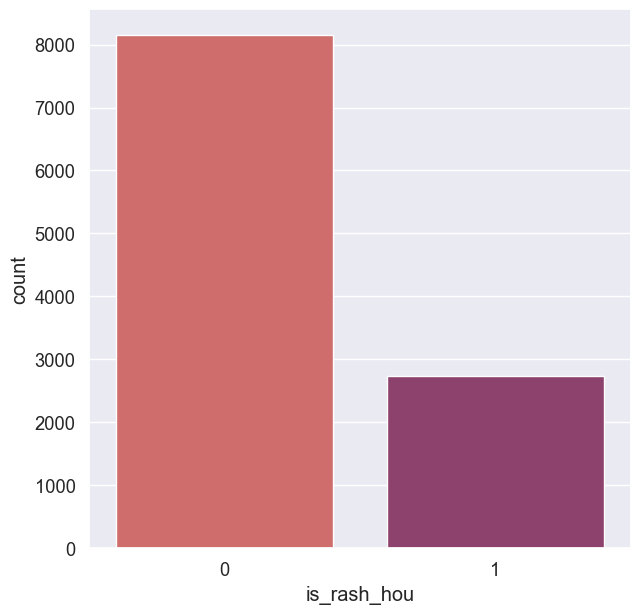

In [58]:
sns.countplot(x='is_rash_hou',data=df,palette='flare')

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   datetime     10886 non-null  datetime64[ns]
 1   season       10886 non-null  int64         
 2   holiday      10886 non-null  int64         
 3   workingday   10886 non-null  int64         
 4   weather      10886 non-null  int64         
 5   temp         10886 non-null  float64       
 6   atemp        10886 non-null  float64       
 7   humidity     10886 non-null  int64         
 8   windspeed    10886 non-null  float64       
 9   casual       10886 non-null  int64         
 10  registered   10886 non-null  int64         
 11  count        10886 non-null  int64         
 12  profit       10886 non-null  float64       
 13  year         10886 non-null  int32         
 14  month_name   10886 non-null  object        
 15  day_weak     10886 non-null  object        
 16  hour

In [60]:
sns.boxplot(x='is_school_day',y='profit',data=df,palette='flare')

ValueError: Could not interpret input 'is_school_day'

In [ ]:
sns.boxplot(x='season',y='profit',data=df,palette='flare')

In [ ]:
sns.boxplot(x='holiday',y='profit',data=df,palette='flare')

In [ ]:
sns.boxplot(x='weather',y='profit',data=df,palette='flare' ,hue='holiday')

In [ ]:
sns.boxplot(x='is_school_day',y='profit',data=df,palette='flare')

In [ ]:
df.describe()

In [ ]:
df.info()

In [ ]:
df.columns

In [ ]:
df.columns

In [ ]:
#from sklearn.impute import SimpleImputer
#imputer=SimpleImputer(strategy='most_frequent')

In [ ]:
#df['casual']=imputer.fit_transform(df[['casual']])

In [ ]:
#df.drop('atemp',axis=1,inplace=True)

In [ ]:
df.info()

In [ ]:
#from sklearn.impute import KNNImputer
#imputer=KNNImputer()

In [ ]:
#for col in[ 'holiday', 'workingday', 'weather', 'temp', 'humidity']:
     
 #   df[col]=imputer.fit_transform(df[[col]])

In [ ]:
df.columns

In [ ]:
df.info()

In [ ]:
#df = pd.get_dummies(df, columns=['month_name'], drop_first=True)
df = pd.get_dummies(df, columns=['month_name'], drop_first=True, dtype=int)

#df=pd.get_dummies(df,columns=['season','weather'],drop_first=True)

In [ ]:
df

In [ ]:
df.describe()[['temp','humidity','count','profit']]

In [ ]:
x=df['city','year','weekofyear']
y=df['total_cases']

In [ ]:
x

In [ ]:
#from sklearn.model_selection import train_test_split

In [61]:
from sklearn.model_selection import train_test_split

# Assuming x and y are your feature and target variables
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


NameError: name 'x' is not defined

In [63]:
from sklearn.model_selection import train_test_split
import numpy as np


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [66]:
x_train.shape

(80, 5)

In [1]:
from sklearn.preprocessing import standardscaler
scaler=standardscaler()

ImportError: cannot import name 'standardscaler' from 'sklearn.preprocessing' (C:\Users\fox\anaconda3\Lib\site-packages\sklearn\preprocessing\__init__.py)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

In [ ]:
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


In [ ]:
# Linear Models
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, ElasticNet

# Support Vector Machines
from sklearn.svm import SVC, SVR

# Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

# Tree-based Models
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor

# Clustering
from sklearn.cluster import KMeans, DBSCAN

# Neural Network
from sklearn.neural_network import MLPClassifier, MLPRegressor

# Naive Bayes
from sklearn.naive_bayes import GaussianNB

# Dimensionality Reduction
from sklearn.decomposition import PCA

# Model Selection
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV

# Metrics
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report, confusion_matrix


In [2]:
model={
    "LR":LinearRegression(),
    "KNNR":KNeighborsClassifier(),
    "SVR":SVR(),
    "DT": DecisionTreeRegressor(),
    "RF":RandomForestRegressor()
    
    
    
    
    
}

NameError: name 'LinearRegression' is not defined

In [3]:
for name, model in model.items():
    print(f"using model: {name}")
    model.fit(x_train, y_train)
    print(f"train score: {model.score(x_train, y_train)}")
    print(f"test score: {model.score(x_test, y_test)}")
    
    print("-----------------------------------------------------")


NameError: name 'model' is not defined